In [1]:
def calculate_bmi(weight, height):
    bmi = weight / ((height / 100) ** 2)
    if bmi<18.5:
      category='Underweight'
    elif 18.5<=bmi<25:
      category='Normal'
    elif 25<=bmi<30:
      category='Overweight'
    else:
      category='Obesity'
    return bmi, category

def calculate_bmr(weight, height, age, gender):
    if gender == 'male':
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    elif gender == 'female':
        bmr = 10 * weight + 6.25 * height - 5 * age - 161
    else:
        print('Invalid gender')
        return None
    return bmr

age = int(input('Enter your age: '))
weight = float(input('Enter your weight in kilograms: '))
height = float(input('Enter your height in centimeters: '))
gender = input('Enter your gender (male/female): ')

bmi, category = calculate_bmi(weight, height)
if bmi is not None:
    print(f'\nYour body mass index is: {bmi:.2f}\n{category}')

bmr = calculate_bmr(weight, height, age, gender)
if bmr is not None:
    print(f'\nYour basal metabolic rate is: {bmr:.2f} calories\n')

Enter your age: 21
Enter your weight in kilograms: 50
Enter your height in centimeters: 154.94
Enter your gender (male/female): female

Your body mass index is: 20.83
Normal

Your basal metabolic rate is: 1202.38 calories



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/datasets/pred_food.csv')

In [5]:
data.head()

,Food Name,Glycemic Index,Calories,Carbohydrates,Protein,Fat,Suitable for Diabetes,Suitable for Blood Pressure,Sodium Content,Potassium Content,Magnesium Content,Calcium Content,Fiber Content
0,Apple,39,52,14.0,0.3,0.2,1,1,0,107,9,6,2.4
1,Banana,51,96,23.0,1.1,0.2,1,1,1,358,27,5,2.6
2,Orange,42,43,9.0,0.9,0.1,1,1,0,181,10,40,2.3
3,Strawberries,40,29,7.0,0.7,0.3,1,1,1,153,13,16,2.0
4,Blueberries,53,57,14.0,0.7,0.3,1,1,1,77,9,6,2.4


In [6]:
data_copy = data.copy()
data_copy.head()

,Food Name,Glycemic Index,Calories,Carbohydrates,Protein,Fat,Suitable for Diabetes,Suitable for Blood Pressure,Sodium Content,Potassium Content,Magnesium Content,Calcium Content,Fiber Content
0,Apple,39,52,14.0,0.3,0.2,1,1,0,107,9,6,2.4
1,Banana,51,96,23.0,1.1,0.2,1,1,1,358,27,5,2.6
2,Orange,42,43,9.0,0.9,0.1,1,1,0,181,10,40,2.3
3,Strawberries,40,29,7.0,0.7,0.3,1,1,1,153,13,16,2.0
4,Blueberries,53,57,14.0,0.7,0.3,1,1,1,77,9,6,2.4


In [7]:
column_to_drop = 'Suitable for Blood Pressure'
dataset = data_copy.drop(column_to_drop, axis=1)
dataset.head()

,Food Name,Glycemic Index,Calories,Carbohydrates,Protein,Fat,Suitable for Diabetes,Sodium Content,Potassium Content,Magnesium Content,Calcium Content,Fiber Content
0,Apple,39,52,14.0,0.3,0.2,1,0,107,9,6,2.4
1,Banana,51,96,23.0,1.1,0.2,1,1,358,27,5,2.6
2,Orange,42,43,9.0,0.9,0.1,1,0,181,10,40,2.3
3,Strawberries,40,29,7.0,0.7,0.3,1,1,153,13,16,2.0
4,Blueberries,53,57,14.0,0.7,0.3,1,1,77,9,6,2.4


In [8]:
fiber_content_mean = dataset['Fiber Content'].mean()

dataset['Fiber Content'].fillna(fiber_content_mean, inplace=True)

print("Missing values after replacement:")
print(dataset.isnull().sum())

Missing values after replacement:
Food Name                0
Glycemic Index           0
Calories                 0
Carbohydrates            0
Protein                  0
Fat                      0
Suitable for Diabetes    0
Sodium Content           0
Potassium Content        0
Magnesium Content        0
Calcium Content          0
Fiber Content            0
dtype: int64


In [9]:
if 'Yes' in dataset['Suitable for Diabetes'] or 'No' in dataset['Suitable for Diabetes']:
    indices = [idx for idx, val in enumerate(dataset['Suitable for Diabetes']) if val in ['Yes', 'No']]
    print("Indices with 'Yes' or 'No' values in the 'Suitable for Diabetes' column:", indices)
else:
    print("No 'Yes' or 'No' values found in the 'Suitable for Diabetes' column.")

No 'Yes' or 'No' values found in the 'Suitable for Diabetes' column.


In [10]:
dataset['Suitable for Diabetes']

0      1
1      1
2      1
3      1
4      1
      ..
497    1
498    1
499    0
500    1
501    1
Name: Suitable for Diabetes, Length: 502, dtype: object

In [11]:
dataset['Suitable for Diabetes'].replace({'Yes': 1, 'No': 0}, inplace=True)

print("Data type after conversion:")
print(dataset['Suitable for Diabetes'].dtype)

Data type after conversion:
object


In [12]:
dataset['Suitable for Diabetes'] = dataset['Suitable for Diabetes'].astype(int)

print("Data type after conversion:")
print(dataset['Suitable for Diabetes'].dtype)

Data type after conversion:
int64


In [13]:
dataset['Suitable for Diabetes']

0      1
1      1
2      1
3      1
4      1
      ..
497    1
498    1
499    0
500    1
501    1
Name: Suitable for Diabetes, Length: 502, dtype: int64

In [14]:
unique_values = dataset['Suitable for Diabetes'].unique()
print("Unique values in the column:", unique_values)

Unique values in the column: [1 0]


In [15]:
print("Summary statistics:")
print(dataset.describe())

Summary statistics:
       Glycemic Index    Calories  Carbohydrates     Protein         Fat  \
count      502.000000  502.000000     502.000000  502.000000  502.000000   
mean        30.173307  189.525896      18.671315    9.520159    9.143625   
std         25.450430  155.613339      17.268291    9.184278   13.790873   
min          0.000000    0.000000       0.000000    0.000000    0.000000   
25%         10.000000   57.000000       5.300000    2.000000    0.400000   
50%         25.000000  160.000000      13.850000    5.400000    4.000000   
75%         50.000000  269.750000      29.750000   15.200000   13.600000   
max         95.000000  902.000000      77.500000   31.000000  100.000000   

       Suitable for Diabetes  Sodium Content  Potassium Content  \
count             502.000000      502.000000         502.000000   
mean                0.924303      219.892430         310.308765   
std                 0.264777      272.788997         206.590965   
min                 0.00000

<Figure size 1200x800 with 0 Axes>

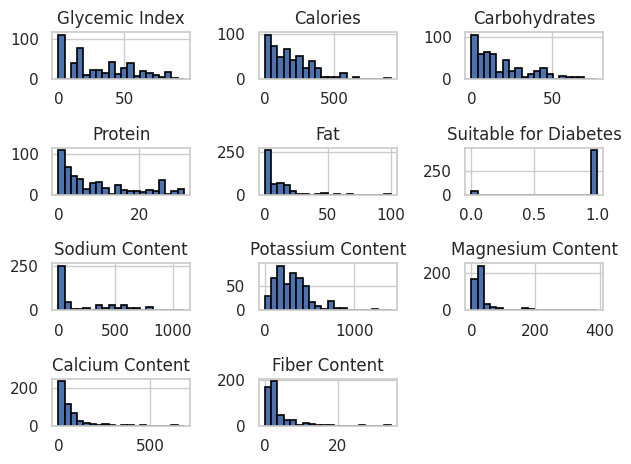

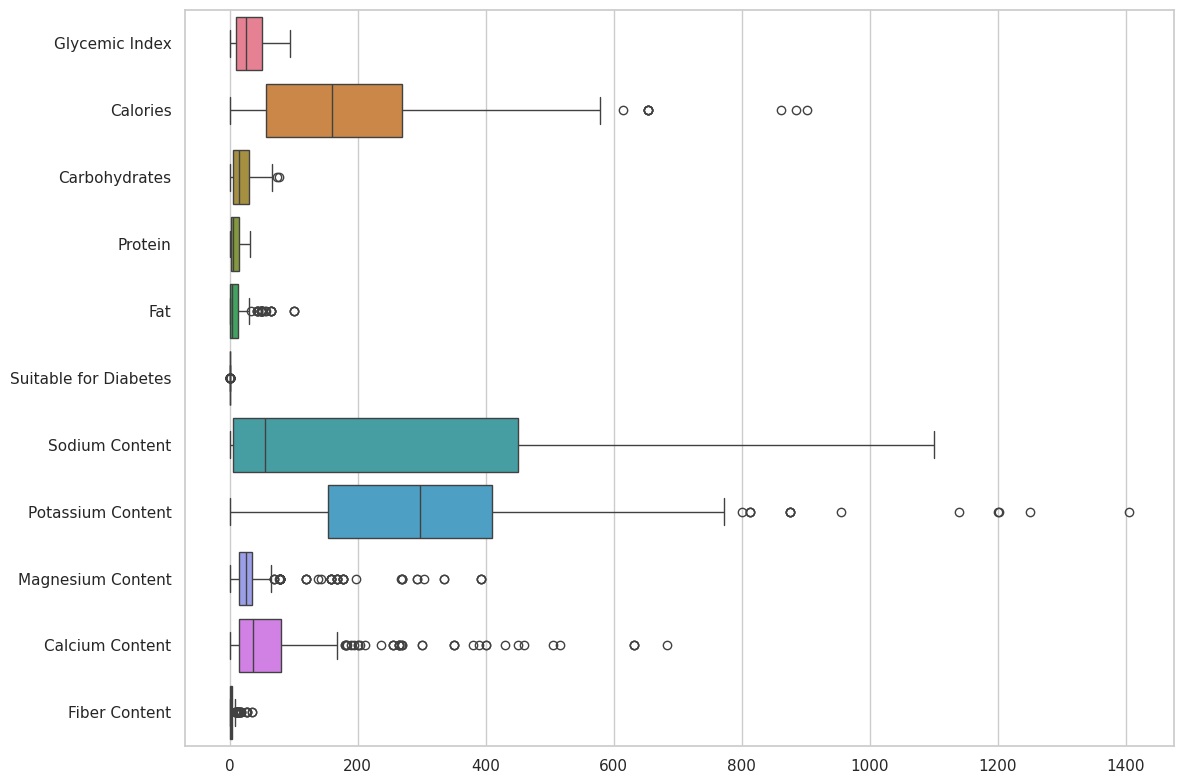

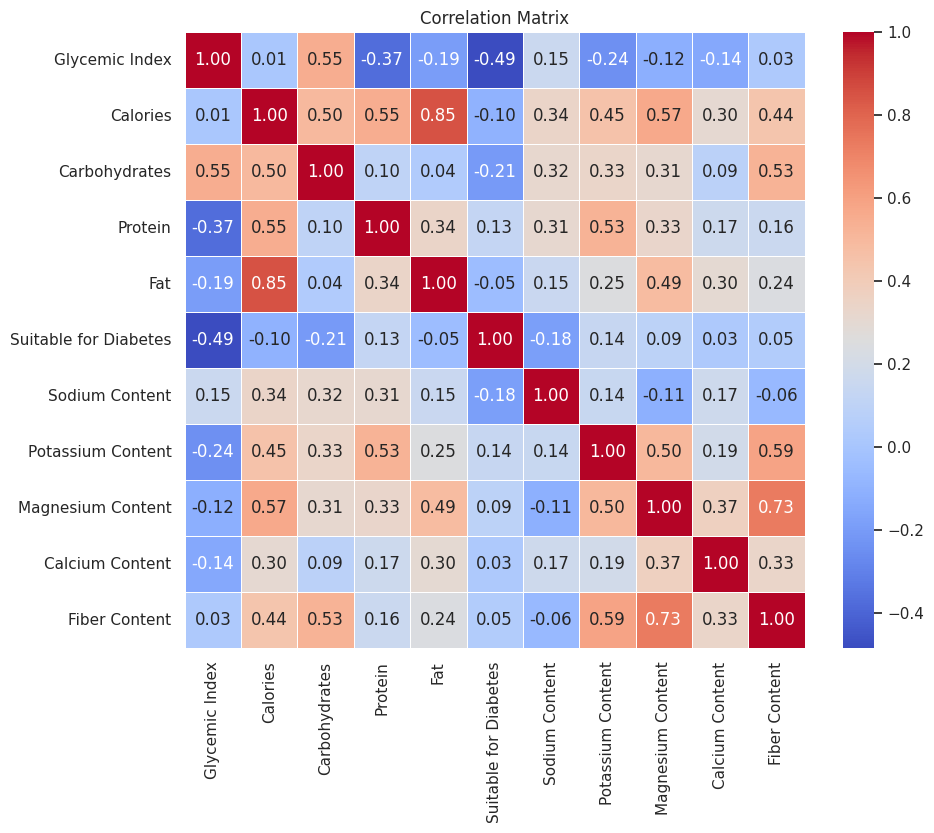

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
dataset.hist(bins=20, edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset.drop(columns=['Food Name']), orient='h')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

data_numeric = dataset.drop(columns=['Food Name'])
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

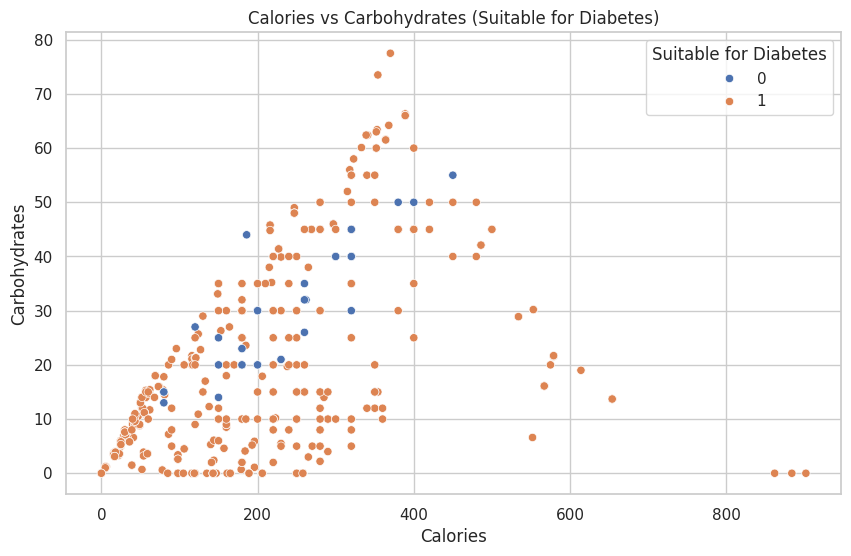

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='Carbohydrates', hue='Suitable for Diabetes', data=dataset)
plt.title('Calories vs Carbohydrates (Suitable for Diabetes)')
plt.xlabel('Calories')
plt.ylabel('Carbohydrates')
plt.legend(title='Suitable for Diabetes', loc='upper right')
plt.show()

In [18]:
dataset.isnull().sum()

Food Name                0
Glycemic Index           0
Calories                 0
Carbohydrates            0
Protein                  0
Fat                      0
Suitable for Diabetes    0
Sodium Content           0
Potassium Content        0
Magnesium Content        0
Calcium Content          0
Fiber Content            0
dtype: int64

In [19]:
dataset.columns

Index(['Food Name', 'Glycemic Index', 'Calories', 'Carbohydrates', 'Protein',
       'Fat', 'Suitable for Diabetes', 'Sodium Content', 'Potassium Content',
       'Magnesium Content', 'Calcium Content', 'Fiber Content'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['Glycemic Index', 'Calories', 'Carbohydrates', 'Protein', 'Fat',
       'Sodium Content', 'Potassium Content', 'Magnesium Content',
       'Calcium Content', 'Fiber Content']

X = dataset[features]
y_diabetes = dataset['Suitable for Diabetes']

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X, y_diabetes, test_size=0.2, random_state=42)

logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

logistic_regression.fit(X_train_diabetes, y_train_diabetes)
decision_tree.fit(X_train_diabetes, y_train_diabetes)
random_forest.fit(X_train_diabetes, y_train_diabetes)

y_pred_logreg = logistic_regression.predict(X_test_diabetes)
y_pred_dt = decision_tree.predict(X_test_diabetes)
y_pred_rf = random_forest.predict(X_test_diabetes)

print("Logistic Regression:")
print(classification_report(y_test_diabetes, y_pred_logreg))
print("Decision Tree:")
print(classification_report(y_test_diabetes, y_pred_dt))
print("Random Forest:")
print(classification_report(y_test_diabetes, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        11
           1       0.93      0.98      0.95        90

    accuracy                           0.91       101
   macro avg       0.80      0.67      0.71       101
weighted avg       0.90      0.91      0.90       101

Decision Tree:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.98      0.96      0.97        90

    accuracy                           0.94       101
   macro avg       0.83      0.89      0.86       101
weighted avg       0.95      0.94      0.94       101

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.97      0.99      0.98        90

    accuracy                           0.96       101
   macro avg       0.93      0.86      0.89       101
weighted avg       0.96

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=1)

rfe.fit(X, y_diabetes)

selected_features = X.columns[rfe.support_]

X_selected = dataset[selected_features]

X_train_selected, X_test_selected, y_train_diabetes, y_test_diabetes = train_test_split(X_selected, y_diabetes, test_size=0.2, random_state=42)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_selected, y_train_diabetes)

    y_pred_selected = model.predict(X_test_selected)

    print(f"Classification Report for {model_name} with selected features:")
    print(classification_report(y_test_diabetes, y_pred_selected))

Classification Report for Logistic Regression with selected features:
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.97      1.00      0.98        90

    accuracy                           0.97       101
   macro avg       0.98      0.86      0.91       101
weighted avg       0.97      0.97      0.97       101

Classification Report for Decision Tree with selected features:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.97      0.97      0.97        90

    accuracy                           0.94       101
   macro avg       0.85      0.85      0.85       101
weighted avg       0.94      0.94      0.94       101



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classification Report for Random Forest with selected features:
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.97      0.98      0.97        90

    accuracy                           0.95       101
   macro avg       0.88      0.85      0.87       101
weighted avg       0.95      0.95      0.95       101



In [22]:
dataset['Food Name'] = dataset['Food Name'].apply(lambda x: x.lower())
dataset.head()

,Food Name,Glycemic Index,Calories,Carbohydrates,Protein,Fat,Suitable for Diabetes,Sodium Content,Potassium Content,Magnesium Content,Calcium Content,Fiber Content
0,apple,39,52,14.0,0.3,0.2,1,0,107,9,6,2.4
1,banana,51,96,23.0,1.1,0.2,1,1,358,27,5,2.6
2,orange,42,43,9.0,0.9,0.1,1,0,181,10,40,2.3
3,strawberries,40,29,7.0,0.7,0.3,1,1,153,13,16,2.0
4,blueberries,53,57,14.0,0.7,0.3,1,1,77,9,6,2.4


In [23]:
features = ['Glycemic Index', 'Calories', 'Carbohydrates', 'Protein', 'Fat',
            'Sodium Content', 'Potassium Content', 'Magnesium Content',
            'Calcium Content', 'Fiber Content']

def get_user_input():
    user_input = {}
    print("Enter the values for the following features:")
    for feature in features:
        user_input[feature] = float(input(f"{feature}: "))
    return user_input

def predict_diabetes(i, user_input):
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])
    # Predict using the trained model
    prediction = logistic_regression.predict(user_df)
    if prediction[0] == 1:
        print(f"Yes, {i} is suitable for diabetes.")
        suitable_food.append(i)
    else:
        print(f"No, {user_input} is not suitable for diabetes.")

In [24]:
check = pd.read_csv('/content/drive/MyDrive/datasets/Data.csv')
check['Ingredient'] = check['Ingredient'].apply(lambda x: x.lower())
check.head()

,Ingredient,Glycemic Index,Calories,Carbohydrates,Protein,Fat,Sodium Content,Potassium Content,Magnesium Content,Calcium Content,Fiber Content,Suitable for Diabetes
0,apple,38,52,14.0,0.3,0.2,1,107,5,6.0,2.4,1
1,apricot,34,48,11.1,1.0,0.4,1,259,10,13.0,2.0,1
2,avocado,10,160,9.0,2.0,15.0,7,485,29,12.0,7.0,1
3,banana,51,89,23.0,1.1,0.3,1,358,27,5.0,2.6,0
4,black chokeberry,35,47,8.6,1.5,0.5,0,70,28,52.0,4.9,1


In [25]:
ingredients = []
ingredient = ''
while ingredient != 'stop':
  ingredient = input("List the ingredients that you have : ")
  ingredients.append(ingredient.lower())
ingredients = ingredients[:-1]
print(ingredients)

List the ingredients that you have : potato
List the ingredients that you have : onion
List the ingredients that you have : tomato
List the ingredients that you have : black quinoa
List the ingredients that you have : stop
['potato', 'onion', 'tomato', 'black quinoa']


In [26]:
suitable_food = []

for i in ingredients:
  # print(i)
  is_ingredient_present1 = str(i) in dataset['Food Name'].values
  is_ingredient_present2 = str(i) in check['Ingredient'].values
  if is_ingredient_present2:
    # print("2")
    if(check[check['Ingredient'] == i]['Suitable for Diabetes'].values[0] == 1):
      print(f"Yes, {i} is suitable for diabetes.")
      suitable_food.append(i)
    else:
      print(f"No, {i} is not suitable for diabetes.")
  elif is_ingredient_present1:
    # print("1")
    if(dataset[dataset['Food Name'] == i]['Suitable for Diabetes'].values[0] == 1):
      print(f"Yes, {i} is suitable for diabetes.")
      suitable_food.append(i)
    else:
      print(f"No, {i} is not suitable for diabetes.")
  else:
    print(f"For {i} - ")
    user_input = get_user_input()
    # print(user_input)
    predict_diabetes(i, user_input)

print(suitable_food)

No, potato is not suitable for diabetes.
Yes, onion is suitable for diabetes.
Yes, tomato is suitable for diabetes.
Yes, black quinoa is suitable for diabetes.
['onion', 'tomato', 'black quinoa']


In [27]:
# for i in ingredients:
#   # print(i)
#   is_ingredient_present = str(i) in dataset['Food Name'].values
#   if is_ingredient_present:
#     if(dataset[dataset['Food Name'] == i]['Suitable for Diabetes'].values[0] == 1):
#       print(f"Yes, {i} is suitable for diabetes.")
#     else:
#       print(f"No, {i} is not suitable for diabetes.")
#   else:
#     print(f"For {i}")
#     user_input = get_user_input()
#     print(user_input)
#     predict_diabetes(user_input)

In [28]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00


In [29]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 4.2 MB/s eta 0:00:00


In [30]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 8.6 MB/s eta 0:00:00


In [31]:
!pip install install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.7 MB/s eta 0:00:00


In [32]:
!pip install llama_index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 95.7 MB/s eta 0:00:00


In [33]:
!pip install llama-index-llms-huggingface

In [34]:
from llama_index.core import VectorStoreIndex,SimpleDirectoryReader,ServiceContext
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core.prompts.prompts import SimpleInputPrompt

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [35]:
documents=SimpleDirectoryReader("/content/drive/MyDrive/DiabetesFood").load_data()

In [36]:
system_prompt="""
Diabetes Food Recommendation
"""
## Default format supportable by LLama2
query_wrapper_prompt=SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

In [37]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [38]:
import torch

llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    tokenizer_name="meta-llama/Llama-2-7b-chat-hf",
    model_name="meta-llama/Llama-2-7b-chat-hf",
    device_map="auto",
    # model_kwargs={"torch_dtype": torch.float16 , "load_in_8bit":True}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [39]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index.core import ServiceContext
# from llama_index.embeddings import LangchainEmbedding

# embed_model=LangchainEmbedding(
#     HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))
embed_model=HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [40]:
!pip install llama-index-embeddings-langchain

In [41]:
service_context=ServiceContext.from_defaults(
    chunk_size=1024,
    llm=llm,
    embed_model=embed_model
)

<ipython-input-41-f6dd2f399444>:1: DeprecationWarning: Call to deprecated class method from_defaults. (ServiceContext is deprecated, please use `llama_index.settings.Settings` instead.) -- Deprecated since version 0.10.0.
  service_context=ServiceContext.from_defaults(


In [42]:
service_context

ServiceContext(llm_predictor=LLMPredictor(system_prompt=None, query_wrapper_prompt=None, pydantic_program_mode=<PydanticProgramMode.DEFAULT: 'default'>), prompt_helper=PromptHelper(context_window=4096, num_output=256, chunk_overlap_ratio=0.1, chunk_size_limit=None, separator=' '), embed_model=LangchainEmbedding(model_name='sentence-transformers/all-mpnet-base-v2', embed_batch_size=10, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7b1106a1fa60>, num_workers=None), transformations=[SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.core.callbacks.base.CallbackManager object at 0x7b1106a1fa60>, id_func=<function default_id_func at 0x7b11e22a3880>, chunk_size=1024, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')], llama_logger=<llama_index.core.service_context_elements.llama_logger.LlamaLogger object at 0x7b1104d2bf70>, callback_manager=<llama_index

In [43]:
index=VectorStoreIndex.from_documents(documents,service_context=service_context)

In [44]:
index

In [45]:
query_engine=index.as_query_engine()

In [47]:
response = query_engine.query(f'Suggest a detailed vegetarian meal for lunch with its recipe using the key ingredient {suitable_food}')

In [51]:
print(response)

1. Quinoa Vegetable Pilaf 
Ingredients: 
- 1 cup black quinoa 
- 1 onion, chopped 
- 1 tomato, diced 
- 1 zucchini, diced 
- 1 red bell pepper, diced 
- 1 carrot, diced 
- 1 clove garlic, minced 
- 1 tsp cumin 
- 1 tsp smoked paprika 
- 1 tsp dried thyme 
- Salt and pepper to taste 

Instructions: 
1. Rinse the quinoa and cook according to package instructions. Fluff with a fork and set aside. 
2. In a large pan, sauté the onion and garlic until translucent. 
3. Add in the diced vegetables and spices. Cook for 5-7 minutes until the vegetables are tender. 
4. Stir in the cooked quinoa and mix everything together. Adjust seasoning if needed.
5. Serve as a side dish or add protein such as grilled tofu to make it a complete meal.

2. Tomato and Quinoa Soup 
Ingredients:
- 1 onion, chopped 
- 2 cloves garlic, minced 
- 1 tbsp olive oil 
- 1 can diced tomatoes 
- 1 cup cooked black quinoa 
- 3 cups vegetable broth 
- 1 tsp dried basil 
- Salt and pepper to taste 

Instructions:
1. In a large